<a href="https://colab.research.google.com/github/MariaLFreitas/Machine_learning/blob/main/L05c_nearest_centroid_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementação com scikit learn
(Para base)

In [ ]:
from sklearn.neighbors import NearestCentroid
import numpy as np

X_train = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y_train = np.array([0, 0, 0, 1, 1, 1])

X_test = np.array([[-1, -2], [0, -1], [-3, -3], [2, 2],  [1, 2]])
y_test = np.array([0, 0, 0, 1, 1])


In [ ]:
cn_model = NearestCentroid(metric='euclidean')
cn_model.fit(X_train, y_train)

cn_model.centroids_

array([[-2.        , -1.33333333],
       [ 2.        ,  1.33333333]])

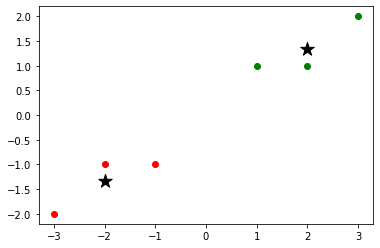

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='r')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='g')

plt.scatter(cn_model.centroids_[:,0], cn_model.centroids_[:,1], s=200, marker='*', c='k')

In [ ]:
y_pred = cn_model.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 1 1]
[0 0 0 1 1]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

#Implementação com Scratch

## `Fit`
Guardando os labels, retornando a media em determinado eixo e os armazenando em um array

## `Predict`
Calculando a distancia euclidiana e armazenando a menor em um array

## `Score`
Calculando o acerto do teste com a predição

In [ ]:
from scipy.spatial import distance
class NearestCentroidScratch():
  def __init__(self, metric='eucledian'):
    self.metric = metric
    self.centroids_ = np.array([])
    self.target_ = np.array([])
  
  def fit(self, X, y):
    self.target_ = np.unique(y)
    c = [np.mean(X[y==i], axis=0) for i in self.target_]
    self.centroids_ = np.vstack((c))
    #print(self.centroids_)

  def predict(self, X): 
    self.predict_ = np.array([], dtype=int)   
    for i in X:                                               
      dist = []
      [dist.append(distance.euclidean(i, self.centroids_[j,:])) for j in range(len(self.target_))] 
      self.predict_ = np.hstack((self.predict_, self.target_[dist.index(np.min(dist))])) 
      #print(self.predict_) 
    return self.predict_

  def score(self, x,y):
    m1 = np.sum(y)
    m2 = np.sum(x)
    self.score_ = m1/m2
    return self.score_

In [ ]:
import numpy as np

X_train = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y_train = np.array([1, 1, 1, 2, 2, 2])

X_test = np.array([[-1, -2], [0, -1], [-3, -3], [2, 2],  [1, 2]])
y_test = np.array([1, 1, 1, 2, 2])

Inicalizando e obtendo as médias

In [ ]:
clf = NearestCentroidScratch()
clf.fit(X_train, y_train)

clf.centroids_



array([[-2.        , -1.33333333],
       [ 2.        ,  1.33333333]])

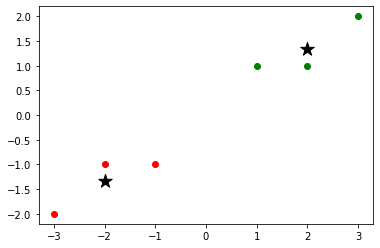

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='r')
plt.scatter(X_train[y_train==2, 0], X_train[y_train==2, 1], c='g')

plt.scatter(clf.centroids_[:,0], clf.centroids_ [:,1], s=200, marker='*', c='k')

Calculando a predição, já é possivel fazer uma comparação dos acertos

In [ ]:
y_pred = clf.predict(X_test)
print(y_pred)
print(y_test)

[1 1 1 2 2]
[1 1 1 2 2]


Calculando os acertos (1 para 100%)

In [ ]:
clf.score(y_test, y_pred)

1.0